In [1]:
from cartpoletestborrowed import CartPoleAgent
from discretize import discretize
from collections import defaultdict
from monte_carlo import *
from q_io import *
from tqdm import trange
from td_methods import *
import gymnasium as gym
from plots import *


In [17]:
epsilon = 0.04
num_episodes = 10000
gamma = 0.95
num_to_avg = 10
step_size = 0.5
env = gym.make('CartPole-v1')
seed = 123

In [18]:
# # # SARSA

np.random.seed(seed)
env.reset(seed=seed)
sarsa_ep_lengths = []
for i in range(num_to_avg):
    Q, policy, ep_lengths = sarsa(env=env, epsilon=epsilon, step_size=step_size, num_eps=num_episodes, gamma=gamma)
    sarsa_ep_lengths.append(ep_lengths)

100%|██████████| 10000/10000 [00:31<00:00, 313.06it/s]


In [19]:
# # prebuilt SARSA

np.random.seed(seed)
env.reset(seed=seed)
new_sarsa_ep_lengths = []
for i in range(num_to_avg):
    agent = CartPoleAgent(epsilon=epsilon, lr=step_size, num_episodes=num_episodes, discount=gamma)
    ep_lengths = agent.train(env=env)
    new_sarsa_ep_lengths.append(ep_lengths)

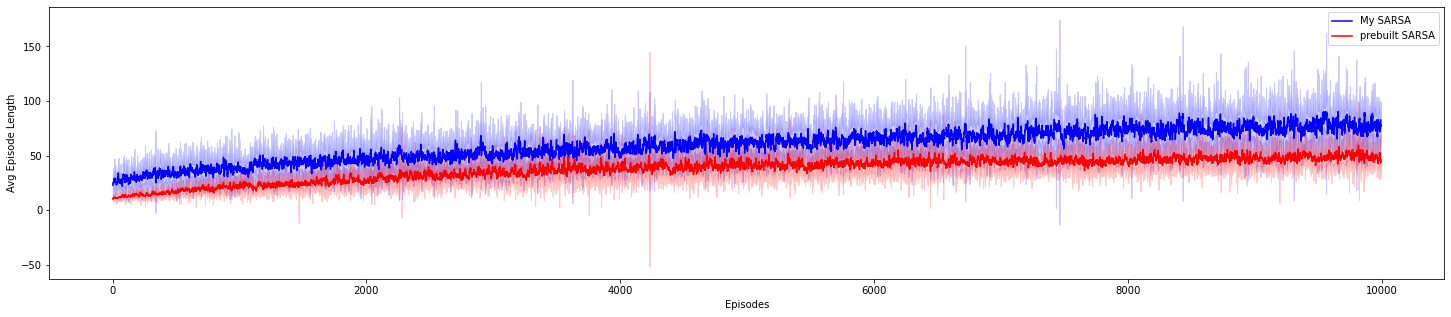

In [20]:
plot_episode_lengths([sarsa_ep_lengths, new_sarsa_ep_lengths], ['My SARSA', 'prebuilt SARSA'], smoothing=5)


In [22]:
run_iterations(gym.make('CartPole-v1', render_mode="human"), Q=Q, n=5)